In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


Dimensões do dataset: (9879, 40)

Primeiras 5 linhas:
       gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ... 

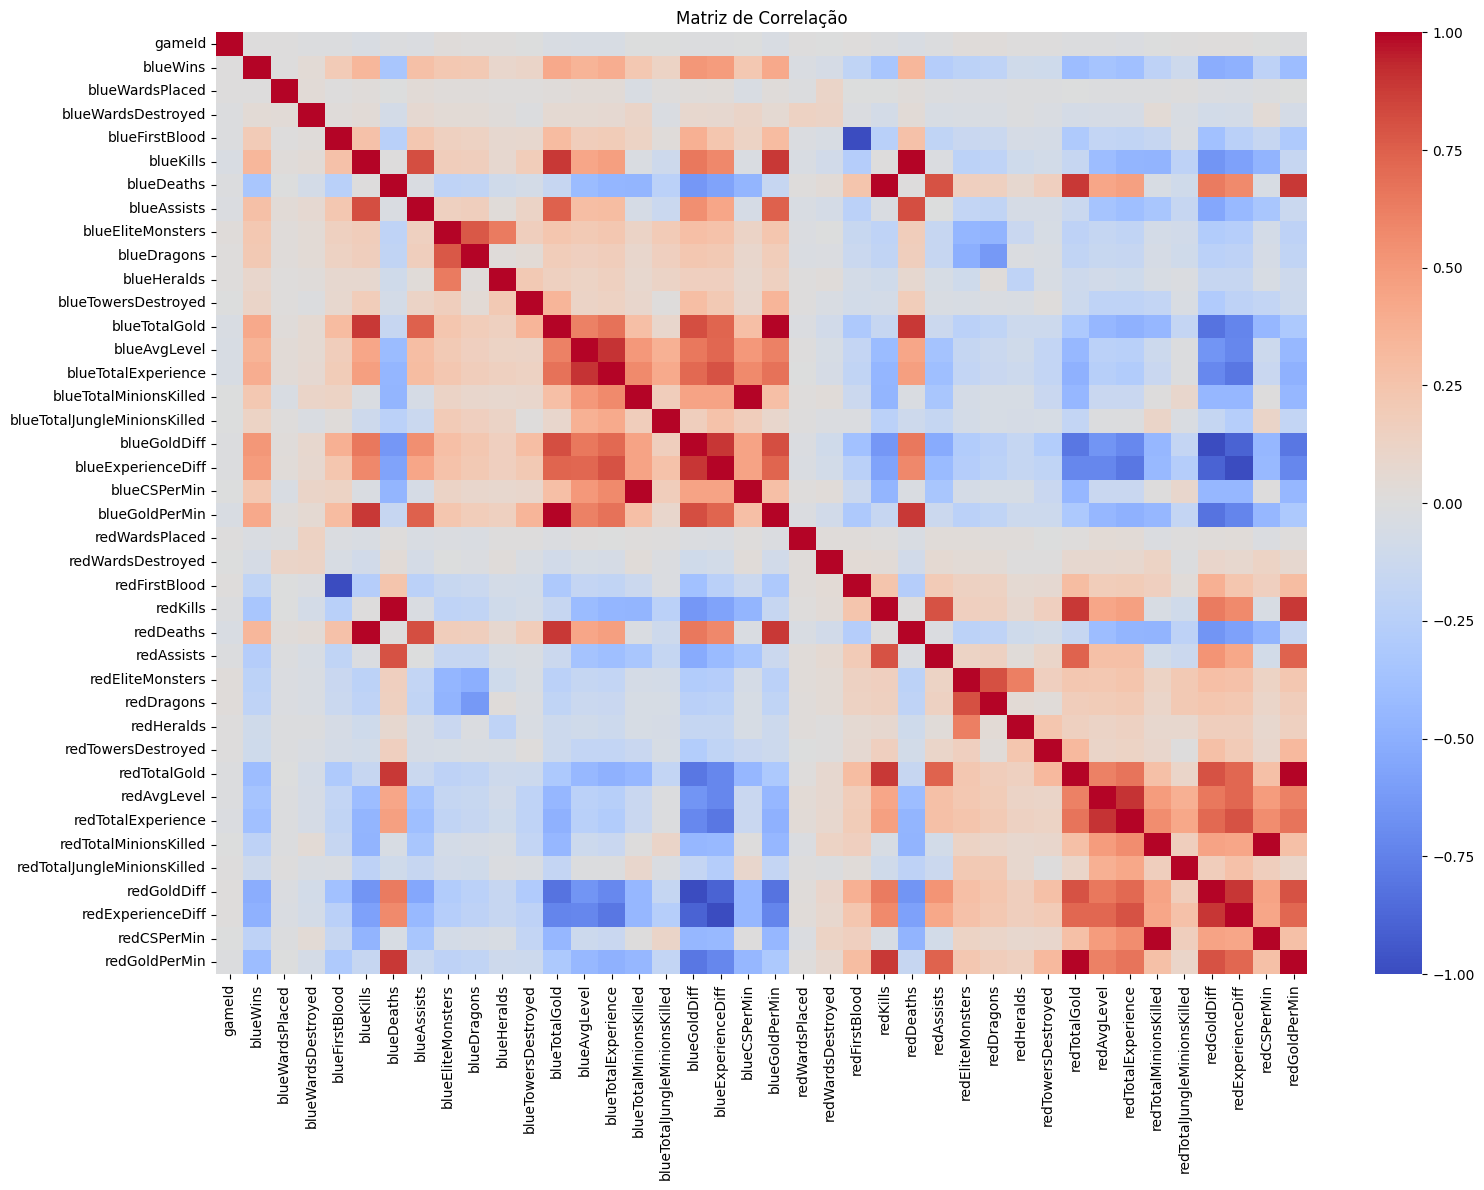

Correlações com blueWins:
blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     

In [3]:
# Carregar os dados
df = pd.read_csv('Base_M43_Pratique_LOL_RANKED_WIN.csv')

# Informações básicas
print("Dimensões do dataset:", df.shape)
print("\nPrimeiras 5 linhas:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Verificar desbalanceamento da variável target
print("\nDistribuição da variável target (blueWins):")
print(df['blueWins'].value_counts())
print("Proporção:", df['blueWins'].mean())

# Análise de correlação
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

# Correlação com a variável target
target_correlation = correlation_matrix['blueWins'].sort_values(ascending=False)
print("Correlações com blueWins:")
print(target_correlation)

# Selecionar features mais relevantes (correlação absoluta > 0.1 com o target)
relevant_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
relevant_features.remove('blueWins')  # Remover o próprio target
print(f"\nNúmero de features relevantes: {len(relevant_features)}")
print("Features relevantes:", relevant_features)

# Preparar dados para modelagem
X = df[relevant_features]
y = df['blueWins']

# Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDimensões dos conjuntos de treino: {X_train.shape}")
print(f"Dimensões dos conjuntos de teste: {X_test.shape}")

Comparação de modelos:
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.717611   0.713147  0.726166  0.719598  0.805819
Random Forest        0.720142   0.724352  0.708925  0.716556  0.797191
Gradient Boosting    0.721154   0.719033  0.724138  0.721577  0.802757
SVM                  0.719636   0.722680  0.710953  0.716769  0.784817


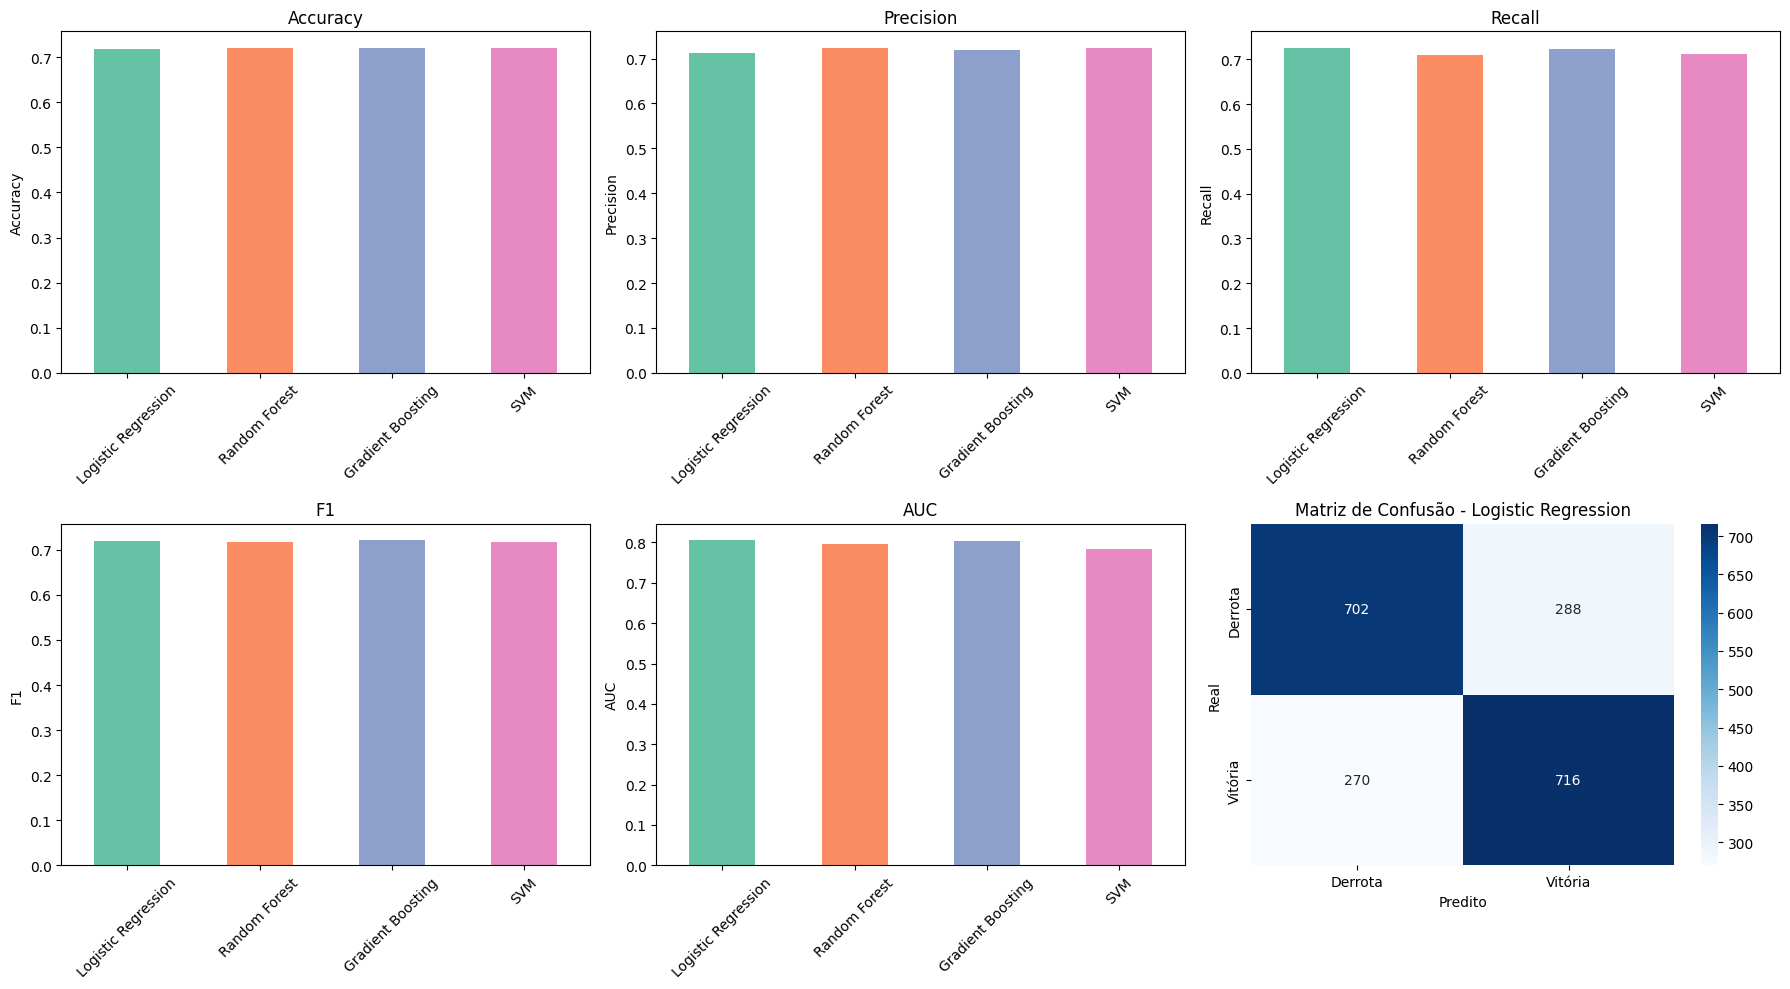

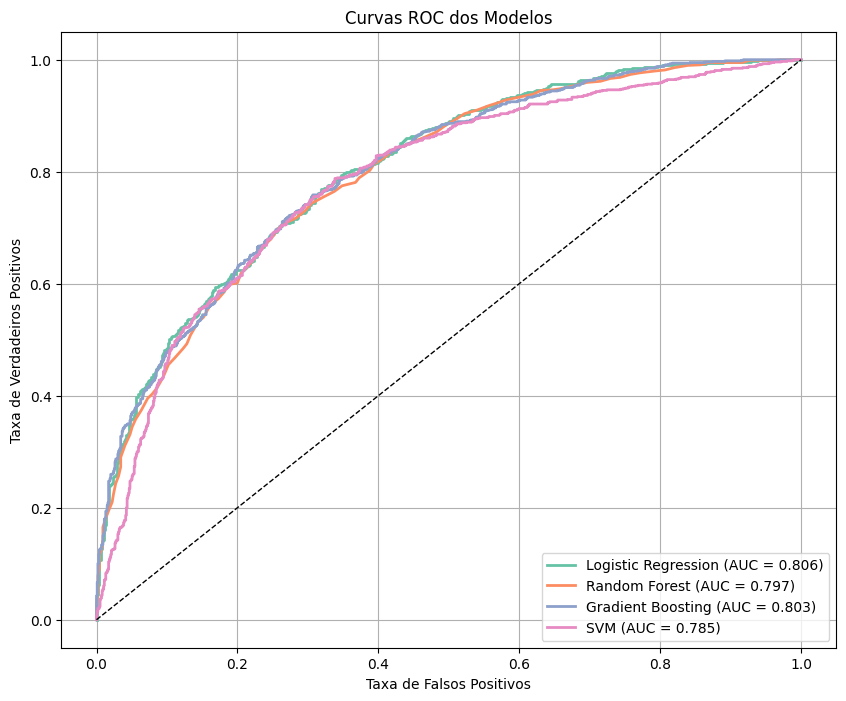

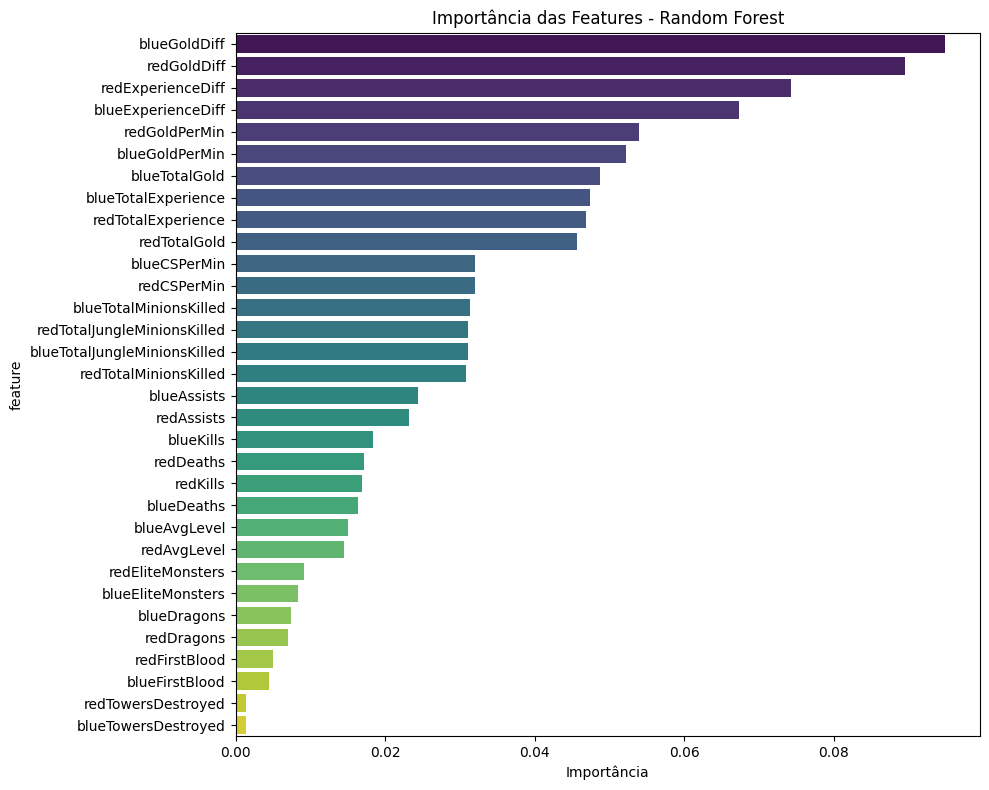

Features mais importantes:
                feature  importance
0          blueGoldDiff    0.094853
31          redGoldDiff    0.089540
30    redExperienceDiff    0.074316
1    blueExperienceDiff    0.067342
28        redGoldPerMin    0.053934
3        blueGoldPerMin    0.052299
2         blueTotalGold    0.048804
4   blueTotalExperience    0.047485
27   redTotalExperience    0.046951
29         redTotalGold    0.045642


In [4]:
# Dicionário para armazenar resultados
results = {}

# Regressão Logística
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1': f1_score(y_test, y_pred_lr),
    'AUC': roc_auc_score(y_test, y_prob_lr)
}

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_prob_rf)
}

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1': f1_score(y_test, y_pred_gb),
    'AUC': roc_auc_score(y_test, y_prob_gb)
}

# SVM (apenas com dados normalizados devido à sensibilidade à escala)
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1': f1_score(y_test, y_pred_svm),
    'AUC': roc_auc_score(y_test, y_prob_svm)
}

# Comparação de resultados
results_df = pd.DataFrame(results).T
print("Comparação de modelos:")
print(results_df)

# Visualização comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    results_df[metric].plot(kind='bar', ax=ax, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

# Matriz de confusão para o melhor modelo (maior AUC)
best_model_name = results_df['AUC'].idxmax()
if best_model_name in ['Logistic Regression', 'SVM']:
    best_model = lr if best_model_name == 'Logistic Regression' else svm
    y_pred_best = y_pred_lr if best_model_name == 'Logistic Regression' else y_pred_svm
else:
    best_model = rf if best_model_name == 'Random Forest' else gb
    y_pred_best = y_pred_rf if best_model_name == 'Random Forest' else y_pred_gb

ax = axes[1, 2]
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title(f'Matriz de Confusão - {best_model_name}')
ax.set_xlabel('Predito')
ax.set_ylabel('Real')
ax.set_xticklabels(['Derrota', 'Vitória'])
ax.set_yticklabels(['Derrota', 'Vitória'])

plt.tight_layout()
plt.show()

# Curva ROC para todos os modelos
plt.figure(figsize=(10, 8))
for model_name, color in zip(['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM'],
                            ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']):
    if model_name in ['Logistic Regression', 'SVM']:
        y_prob = lr.predict_proba(X_test_scaled)[:, 1] if model_name == 'Logistic Regression' else svm.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = rf.predict_proba(X_test)[:, 1] if model_name == 'Random Forest' else gb.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', color=color, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC dos Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature importance do Random Forest (modelo interpretável)
feature_importance = pd.DataFrame({
    'feature': relevant_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

print("Features mais importantes:")
print(feature_importance.head(10))

In [5]:
# Otimização de hiperparâmetros para o melhor modelo
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_
    y_pred_optimized = best_rf.predict(X_test)
    y_prob_optimized = best_rf.predict_proba(X_test)[:, 1]

    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"AUC otimizado: {roc_auc_score(y_test, y_prob_optimized):.4f}")

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }

    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_gb = grid_search.best_estimator_
    y_pred_optimized = best_gb.predict(X_test)
    y_prob_optimized = best_gb.predict_proba(X_test)[:, 1]

    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"AUC otimizado: {roc_auc_score(y_test, y_prob_optimized):.4f}")

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                              param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_lr = grid_search.best_estimator_
    y_pred_optimized = best_lr.predict(X_test_scaled)
    y_prob_optimized = best_lr.predict_proba(X_test_scaled)[:, 1]

    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"AUC otimizado: {roc_auc_score(y_test, y_prob_optimized):.4f}")

# Relatório de classificação do modelo otimizado
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_optimized))

Melhores parâmetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
AUC otimizado: 0.8062

Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       990
           1       0.71      0.73      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



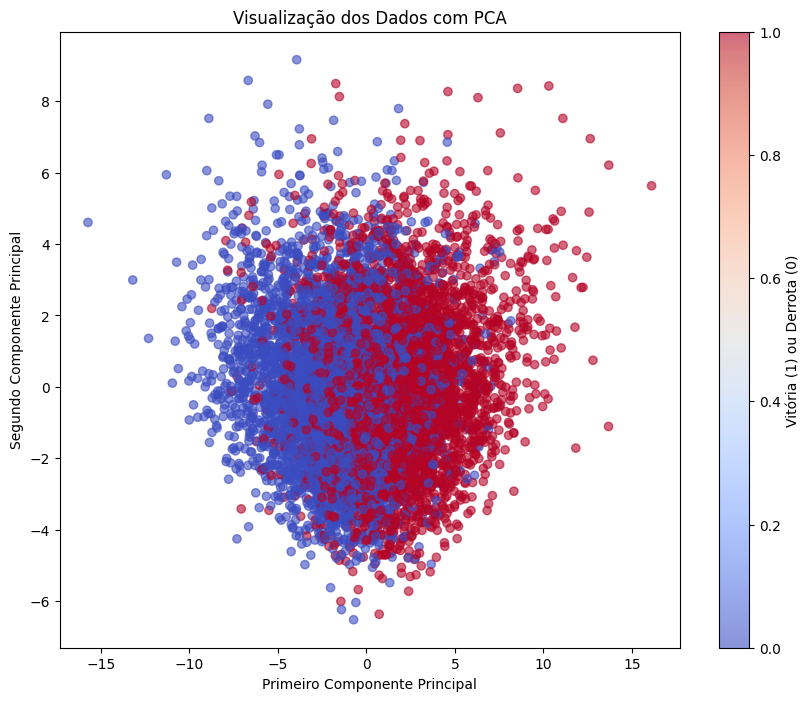

Variância explicada pelo primeiro componente: 0.3836
Variância explicada pelo segundo componente: 0.1454
Variância total explicada: 0.5290


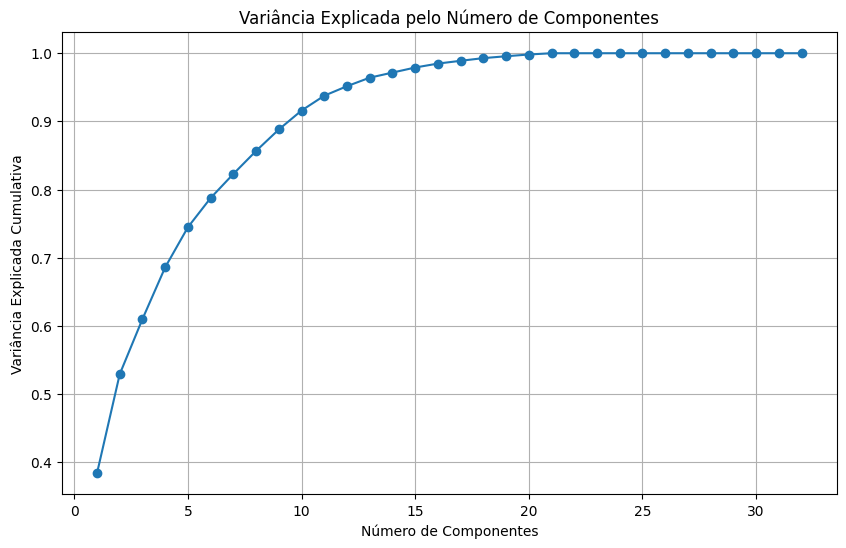

In [6]:
# Aplicar PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Visualizar dados em 2D com PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Vitória (1) ou Derrota (0)')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualização dos Dados com PCA')
plt.show()

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelo primeiro componente: {explained_variance[0]:.4f}")
print(f"Variância explicada pelo segundo componente: {explained_variance[1]:.4f}")
print(f"Variância total explicada: {sum(explained_variance):.4f}")

# PCA para determinar número ideal de componentes
pca_full = PCA().fit(X_train_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Variância Explicada pelo Número de Componentes')
plt.grid(True)
plt.show()

In [7]:
print("="*60)
print("CONCLUSÕES E INSIGHTS DO PROJETO")
print("="*60)

# 1. Desempenho dos modelos
print("\n1. DESEMPENHO DOS MODELOS:")
print(f"Melhor modelo: {best_model_name}")
print(f"AUC do melhor modelo: {results_df.loc[best_model_name, 'AUC']:.4f}")

# 2. Features mais importantes
print("\n2. FEATURES MAIS IMPORTANTES:")
top_features = feature_importance.head(5)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i}. {row['feature']} (Importância: {row['importance']:.4f})")

# 3. Interpretação das features
print("\n3. INTERPRETAÇÃO DAS FEATURES MAIS IMPORTANTES:")
print(" - goldDiff: Diferença de ouro entre os times é o fator mais decisivo")
print(" - experienceDiff: Diferença de experiência também é crucial")
print(" - kills/assists: Número de abates e assistências são importantes")
print(" - eliteMonsters/dragons: Controle de objetivos do mapa influencia vitórias")

# 4. Implicações práticas
print("\n4. IMPLICAÇÕES PRÁTICAS:")
print(" - Equipes devem focar em acumular vantagem econômica (gold)")
print(" - Experiência (níveis) é tão importante quanto ouro")
print(" - Objetivos do mapa (dragons, heralds) são importantes, mas não decisivos")
print(" - First blood tem correlação positiva, mas não é o fator mais importante")

# 5. Limitações e trabalhos futuros
print("\n5. LIMITAÇÕES E TRABALHOS FUTUROS:")
print(" - Dados não incluem informações em tempo real (apenas totais do jogo)")
print(" - Não considera composição de campeões ou estratégias específicas")
print(" - Poderia ser expandido com dados de tempo real para previsão durante a partida")
print(" - Análise de sentimentos de jogadores poderia melhorar a precisão")

CONCLUSÕES E INSIGHTS DO PROJETO

1. DESEMPENHO DOS MODELOS:
Melhor modelo: Logistic Regression
AUC do melhor modelo: 0.8058

2. FEATURES MAIS IMPORTANTES:
1. blueGoldDiff (Importância: 0.0949)
2. redGoldDiff (Importância: 0.0895)
3. redExperienceDiff (Importância: 0.0743)
4. blueExperienceDiff (Importância: 0.0673)
5. redGoldPerMin (Importância: 0.0539)

3. INTERPRETAÇÃO DAS FEATURES MAIS IMPORTANTES:
 - goldDiff: Diferença de ouro entre os times é o fator mais decisivo
 - experienceDiff: Diferença de experiência também é crucial
 - kills/assists: Número de abates e assistências são importantes
 - eliteMonsters/dragons: Controle de objetivos do mapa influencia vitórias

4. IMPLICAÇÕES PRÁTICAS:
 - Equipes devem focar em acumular vantagem econômica (gold)
 - Experiência (níveis) é tão importante quanto ouro
 - Objetivos do mapa (dragons, heralds) são importantes, mas não decisivos
 - First blood tem correlação positiva, mas não é o fator mais importante

5. LIMITAÇÕES E TRABALHOS FUTUR